# Ricorsioni grafiche nel mondo di Escher

In questo notebook python vediamo come usando un linguaggio di programmazione molto semplice possiamo **programmare** delle funzioni ricorsive che trasformano immagini semplici in immagini articolate. L'obiettivo finale è di capire e imparire a scrivere un programma che produca un'immagine simile allo [woodcut di Escher](https://www.wikiart.org/en/m-c-escher/square-limit) chiamato **Square Limit**:

![Escher's Fish](fishEscher.jpg)

**NOTA:** Per altre opere, si veda la pagina di [M.C. Escher](https://en.wikipedia.org/wiki/M._C._Escher)

### Linguaggio di Programmazione: MicroPython
Useremo un micro linguaggio di Programmazione che contiene solo gli elementi seguenti:

1. L'assegnamento di valori a variabili.
2. La definizione di funzioni semplici e ricorsive.
3. La composizione di funzioni.
4. Espressioni condizionali

Vedremo come questi elementi di base possono essere usati per manipolare un dato **primitivo** di natura grafica.

Per prima cosa, dobbiamo importare una libreria (insieme di funzioni di base) che permettono di manipolare dei semplici oggetti grafici. Il file [escherFish.py] deve essere salvato nella stessa directory di questo notebook.

In [ ]:
from escherFish import *

Per poter eseguire il blocco di codice precendente avete due opzioni:
1. Premere **CTRL+ENTER**: in questo caso il codice viene eseguito, senza altre operazioni
2. Premere **ALT+ENTER**: in questo caso, oltre ad eseguire il codice si apre un nuovo blocco di codice vuoto.

### Dato grafico primitivo: il *TILE*
Se guardiamo il *woodcut* di Escher precedente, risulta chiaro come sia ottenuto dalla ripetizione di uno stesso **elemento base** (ovvero, un pesce stilizzato), che è stato opportunamente orientato, ridimensionato, e colorato.

Per poter cercar di riprodurre quel quadro "*programmando*", abbiamo bisogno di definire un tipo di dato fondamentale, un elemento base, che viene chiamato **TILE**. Un *tile* rappresenta un disegno unico racchiuso in un quadrato di lato unitario. Mostriamo nel seguito, come a partire da un singolo *tile*, attraverso la composizione di una sequenza di funzioni, possiamo ottenere dei disegni più complessi.

Iniziamo con un tile asimmetrico, in modo da mostrare più facilmente il tipo di trasformazioni che abbiamo a disposizione. 

Il primo tile che consideriamo è una rappresentazione grafica della lettera ``F`` (andate sul blocco e premete CTRL+ENTER):

In [ ]:
f

Si osservi che la parte tratteggiata non è parte del tile, ma serve per evidenziare il quadrato entro cui la tile è contenuta. Inoltre si noti come il tipo di dato "tile" è stato definito in modo che venga visualizzato nel notebook in modo automatico, senza bisogno di richiamare una funzione particolare.

## Operazioni fondamentali
Vediamo ora due semplici funzioni che possiamo applicare ad un tile: possiamo ruotare in senso antiorario di $90^o$ un tile, oppure possiamo "ribaltare" (in inglese, *flip*) un tile rispetto al suo asso verticale che passa per il centro del quadrato. Per esempio, possiamo applicare al tile ``f`` le due funzioni:

In [ ]:
rot(f)

In [ ]:
flip(f)

Si noti come la sintassi per definire una funzione che opera su un tile sia la stessa usata per la definizione di funzioni numeriche, tipo `sin(x)`, `cos(x)` o `log(x)`. L'unica differenza è queste funzioni non prendono in input un numero, ma stiamo usando un dato primitivo di tipo grafico. Ovvero stiamo utilizzando delle funzioni:

$$f : X \rightarrow Y$$

dove $X$ e $Y$ sono l'insieme delle possibili tiles (mentre, ad esempio, per le funzioni trigonometriche $X$ e $Y$ sono sottoinsiemi di $\mathbb{R}$).

Come si possono *comporre*e semplici operazioni aritmetiche (e.g., `sin(cos(x))`), anche per i tile, possiamo comporre più funzioni applicandone una dopo l'altra. Per esempio:

In [ ]:
flip(rot(f))

In [ ]:
rot(flip(f))

Chiaramente, l'ordine con cui vengono applicate le diverse funzioni può portare a degli oggetti diversi.

## 1. Assegnamento di valori a variabili
Abbiamo detto sopra che nel nostro linguaggio possiamo introdurre delle nuove **variabili** che "memorizzano" un valore (un tile) modificato da una funzione:

In [ ]:
fr = rot(f)

In questo caso, l'effetto dell'operatore di assegnamento (il simbolo dell'uguale `=`) è di assegnare alla variabile `fr` il valore di `f` ruotato di $90^o$ in senso antiorario. Se vogliamo vedere il valore della variabile `fr`, basta digitare:

In [ ]:
fr

**DOMANDA 1:** Non sarebbe comodo avere una funzione primitiva per ruotare un tile di $90^o$ in senso orario?

In [ ]:
# Provare le soluzioni proposte

Oltre a funzioni *unarie*, ovvero che prendono in input un solo argomento, possiamo definire delle operazioni fondamentali *binarie*, che prendono in input due tile e li combinano per produrre un nuovo tile:

$$f : X \times X \rightarrow X$$

Le operazioni fondamentali che introduciamo nel nostro linguaggio *grafico* sono: ``above(x, y)``, ``beside(x, y)``, e ``over(x, y)``. Le prime due operazioni affiancano le due tile `x` e `y` una sopra l'altra e riscalandole in modo che il risultato sia ancora una tile contenuta nel quadrato unitario. La terza operazione, ``over``, sovrappone semplicemente le due tile.

In [ ]:
beside(f, f)

In [ ]:
above(flip(f), rot(f))

In [ ]:
over(f, flip(f))

In [ ]:
over(flip(f), f)

## 2. Definizione di nuove funzioni
In un linguaggio di programmazione è possibile  definire nuovi funzioni che a partire dall'insieme di funzioni "primitive" del linguaggio. In questa lezione siamo interessati a definire delle funzioni che operano sui tiles, prendendo in input uno o più tile, e restituiscono in output un nuovo tile. 

La **sintassi** del linguaggio per definire nuove funzioni è la seguente:

```
def <nomefunzione>(<lista di variabili di input>):
    # insieme di operazioni e applicazioni di funzioni
    return <valore finale>
```

Le parole chiave del linguaggio sono **`def`** e **`return`**; i due punti **`:`** e la tabulazione dopo la parola **`def`** è importante.

`<nomefunzione>`, `<lista di variabili di input>`, e `<valore finale>` siete voi a doverli definire.

Vediamo ora un esempio:

In [ ]:
def quartet(p, q, r, s):
    return above(beside(p,q), beside(r,s))

Si noti come le parole chiave del linguaggio e il nome della funzione `quartet` sono colorate di un colore diverso. 

La funzione prende in input quattro variabili, chiamate semplicemente `p`, `q`, `r`, e `s`, e produce in output un tile che risulta da mettere l'immagine ottenuta affiancando `p` e `q`, sopra l'immagine ottenuta affiancando `r` e `s` (notare che è quasi più semplice leggere il codice che non la sua descrizione testuale...).

Una volta definita la funzione `quartet` può essere utilizzata nel modo seguente:

In [ ]:
quartet(f, flip(f), flip(rot(rot(f))), rot(rot(f)))

In [ ]:
qf = quartet(f, flip(f), flip(rot(rot(f))), rot(rot(f)))

In [ ]:
qf2 = quartet(qf, qf, qf, qf)

In [ ]:
quartet(qf2, qf2, qf2, qf2)

### Definizioni di funzioni ricorsive ed espressioni condizionali
A questo punto possiamo introdurre delle funzioni **ricorsive** che costruiscono delle nuove tile che sono "auto simili". 

Un semplice esempio di funzione ricorsiva, che non opera sulle immagini, ma sui numeri, è la seguente

In [ ]:
def F(a, b):
    if b == 0:
        return a
    return F(a+1, b-1)

Abbiamo introdotto la nuova parola chiave `if` che serve per valutare una **espressione condizionale**: in questo caso si controlla che il valore della variabile di input chiamata `b` sia uguale a zero; se l'espressione viene verificata, allora viene restituito il valore di `a`. Altrimenti viene restituito il valore ottenuto richiamando la stessa funzione, ma con due nuove variabili di input di valore `a+1` e `b-1`.

**DOMANDA 2:** Qual'è il risultato di questa "chiamata" alla funzione `F`?

```F(13,9)```

In [ ]:
# Provare a richiamare la funzione F(13,9)
F(13, 9)

**IMPORTANTE**: La funzione `F(a, b)` è detta ricorsiva perché è definita in termini di se stessa.

In [ ]:
triangle

In [ ]:
blank

## 3. Composizione di funzioni
Vediamo cosa possiamo comporre funzioni ricorsive per le immagini.
Consideriamo prima due nuovi tipi di tile: 

1. un triangolo 
2. un tile vuoto, chiamato `blank`

Usando questi due tile, possiamo costruire un nuovo "quartetto" chiamato `rectric`, in cui il quadrato in alto a sinistra è un triangolo ruotato, mentre gli altri tre sono dei tile definiti in modo uguale. Ovvero possiamo definire la funzione ricorsiva:

In [ ]:
def rectric(n):
    if n == 0:
        return blank
    else:
        return quartet(rot(triangle), rectric(n-1), rectric(n-1), rectric(n-1))

Richiamando la funzione appena definita con diversi valori di $n$ dovremmo capire facilmente il processo di calcolo sviluppato da questa funzione ricorsiva.

**DOMANDA 3**: Cosa vi aspettate come risultato della chiamata alla funzione `rectric(1)`?

In [ ]:
rectric(1)

In [ ]:
rectric(2)

In [ ]:
rectric(3)

In [ ]:
rectric(8)

### Altre trasformazioni di base
Cosa potremmo fare se invece di un "quartetto" volessimo la combinazione di nove tile in una griglia 3 per 3? L'operazione ``beside`` che abbiamo introdotto prima, partiziona lo spazio verticale in due parti uguali. Quindi non possiamo usarla per definire una griglia 3 per 3 senza prima aggiungere la possibilità di definire quanto spazio lasciare per il primo tile e quanto per il secondo.

In pratica, vogliamo poter passare come argomento alla funzione tile la frazione di spazio occupata dal primo tile e la frazione usata dal secondo:

In [ ]:
beside(flip(f), f, 2, 3)

In pratica, abbiamo introdotto la funzione `beside(x, y, a, b)`, che prende in input quattro parametri. I due nuovi parametri `a` e `b` servono per stabilire quanto spazio lasciare al primo tile a quanto al secondo.

Nella chiamata precedente, il primo tile ha preso 2/5 dello spazio orizzontale disponibile (ovvero $\frac{a}{a+b}$), mentre la seconda tile ha preso i 3/5 (ovvero $\frac{a}{a+b}$). 

Anche la funzione ``above`` può prendere quattro parametri: `beside(x, y, a, b)`.

Usando queste definizioni, a questo punto possiamo definire la funzione ``nonet``:

In [ ]:
def nonet(p, q, r, s, t, u, v, w, x):
    return above(
            beside(p, beside(q,r), 1, 2),
            above(
                beside(s, beside(t, u), 1, 2),
                beside(v, beside(w, x), 1, 2)
            ),
            1, 2)

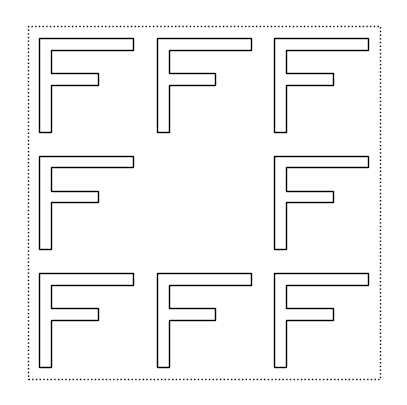

In [36]:
nonet(f,f,f,f,blank,f,f,f,f)

# Decomposizione del *woodcut* di Escher
Veniamo ora al quadro da cui siamo partiti in questo notebook.

Il tile fondamentale del quadro di Escher è il seguente "pesce":

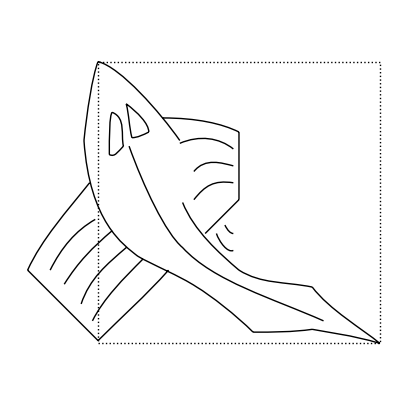

In [37]:
fish

Anche se non è completamente contenuto in un quadrato unitario, fu scelto da Escher in quanto è una forma in grado di "combaciare" con una sua stessa rotazione:

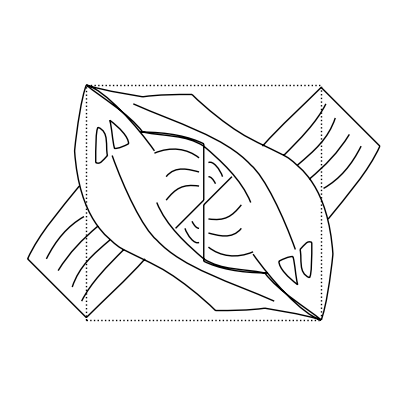

In [38]:
over(fish, rot(rot(fish)))

Questa immagine ha anche altre proprietà "*magiche*". Prima però, aggiungiamo un'altra operazione di base al nostro linguaggio grafico: definiamo una trasformazione, chiamata ``rot45()`` che ruota un tile di $45^o$ e la ridimensiona di una fattore $\sqrt(2)$. Vediamo cosa esegue questa trasformazione usando un triangolo:

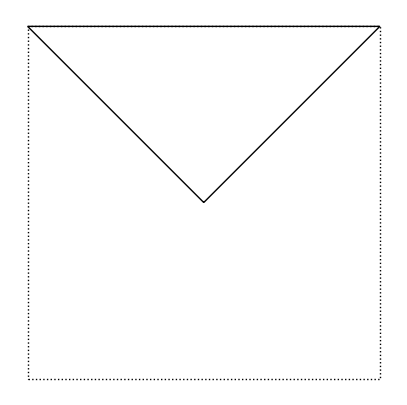

In [39]:
rot45(triangle)

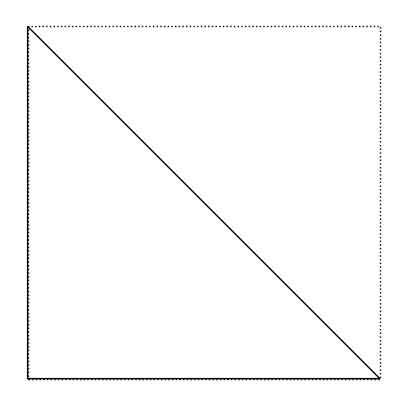

In [40]:
triangle

Il pesce è cosi "*magico*" perché se prendiamo questa nuova trasformazione e la tile che produce, possiamo comporre diverse operazioni per ottenere le tile seguenti:

In [41]:
smallfish = flip(rot45(fish))

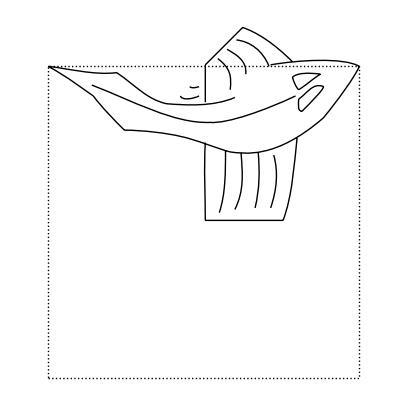

In [42]:
smallfish

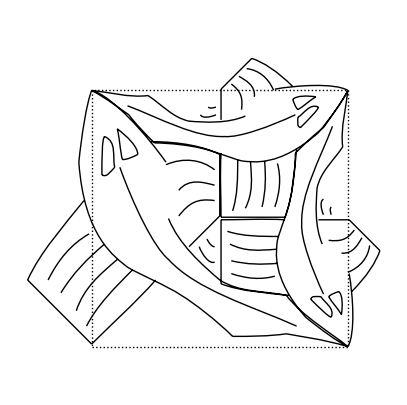

In [43]:
t = over(fish, over(smallfish, rot(rot(rot(smallfish)))))
t

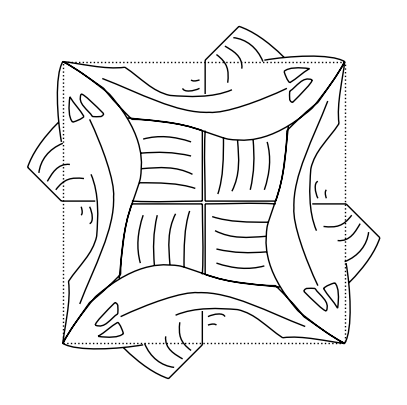

In [44]:
u = over(over(over(smallfish, rot(smallfish)), rot(rot(smallfish))), rot(rot(rot(smallfish))))
u

Si osservi che le due tile ``t`` e ``u`` appena definite solo i blocchi base del quadro:

![Escher's Fish](fishEscher.jpg)

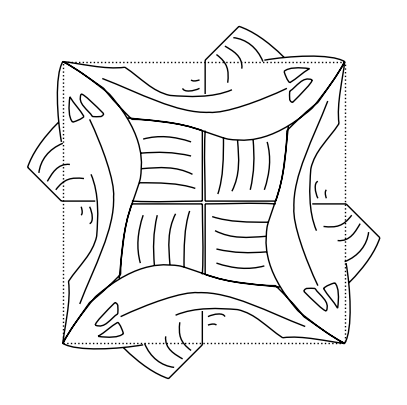

In [45]:
u

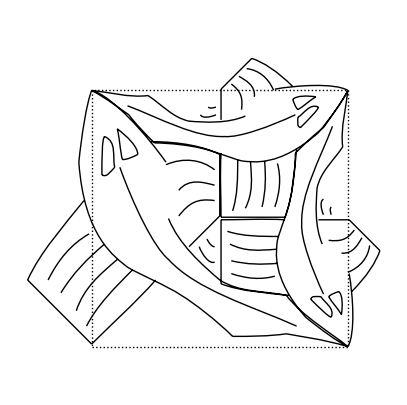

In [46]:
t

Questi due blocchi base vengono utilizzati per definire due funzioni ricorsive:

In [47]:
def side(n):
    if n == 0: 
        return blank
    else: 
        return quartet(side(n-1), side(n-1), rot(t), t)
    
def corner(n):
    if n == 0:
        return blank
    else:
        return quartet(corner(n-1), side(n-1), rot(side(n-1)), u)

Vediamo ora cosa fanno in pratica queste due funzioni.

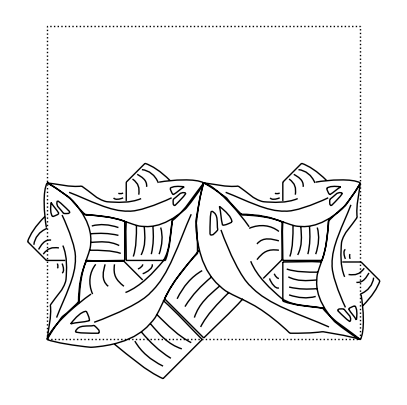

In [48]:
side(1)

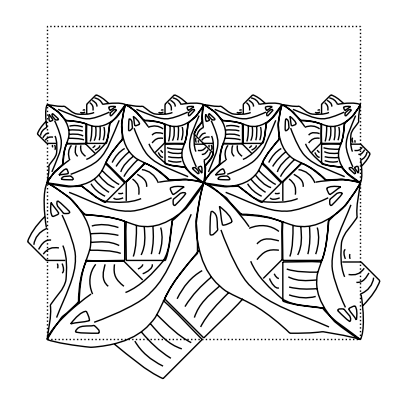

In [49]:
side(2)

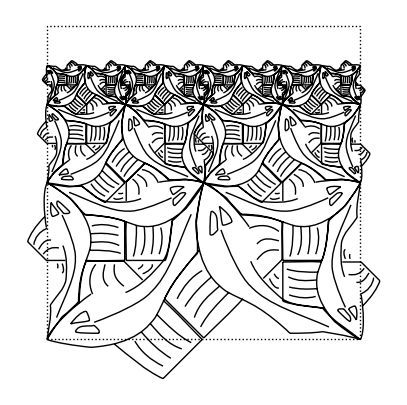

In [50]:
side(3)

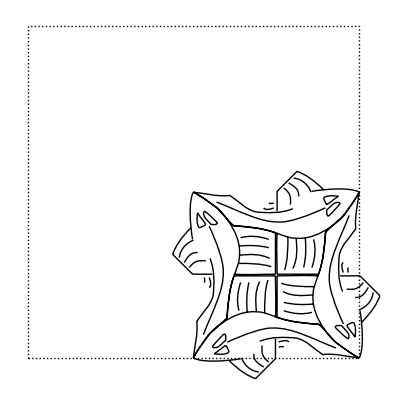

In [51]:
corner(1)

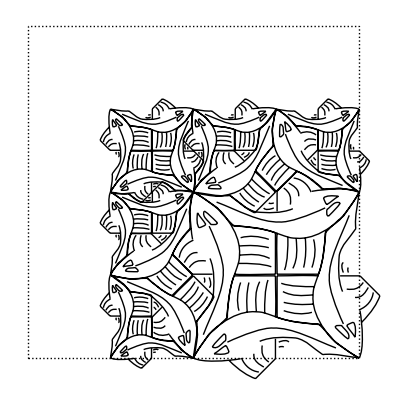

In [52]:
corner(2)

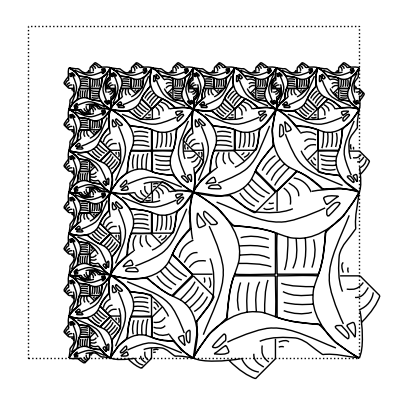

In [53]:
corner(3)

A questo punto abbiamo tutti gli elementi per arrivare a definire un'immagine grafica di un certo effetto, componendo tutte le varie operazioni introdotte:

In [54]:
def squarelimit(n):
    return nonet(
        corner(n), 
        side(n), 
        rot(rot(rot(corner(n)))), 
        rot(side(n)), 
        u, 
        rot(rot(rot(side(n)))),
        rot(corner(n)), 
        rot(rot(side(n))), 
        rot(rot(corner(n)))
    )

In [58]:
setSize(10)

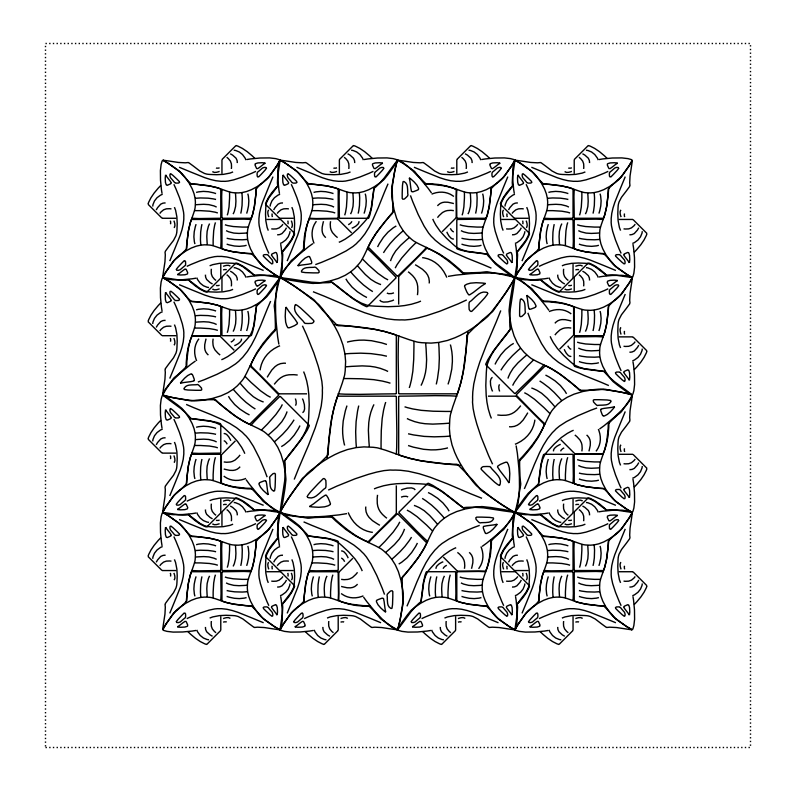

In [59]:
squarelimit(1)

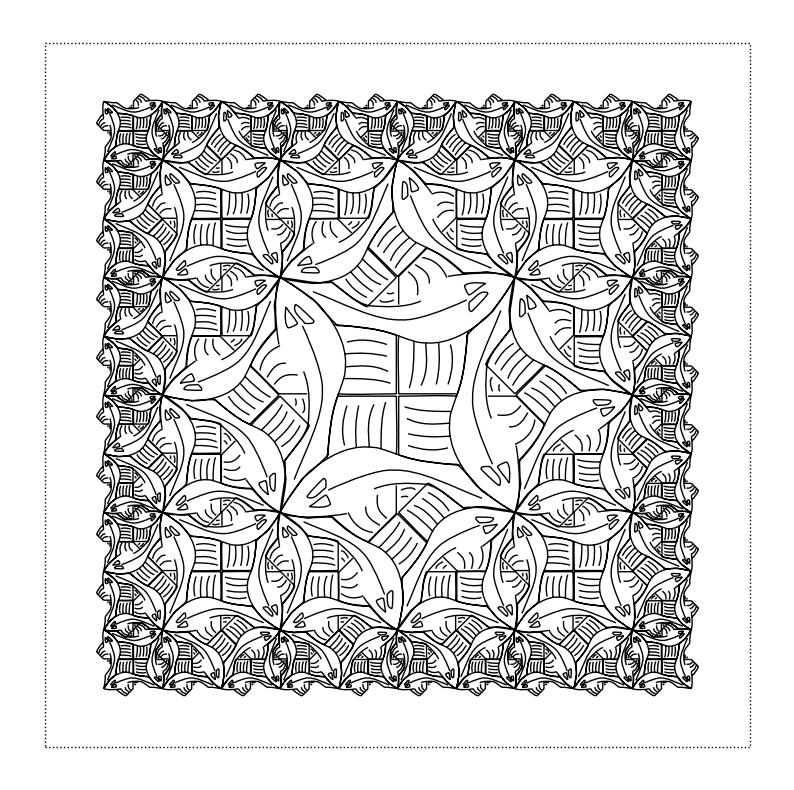

In [60]:
squarelimit(2)

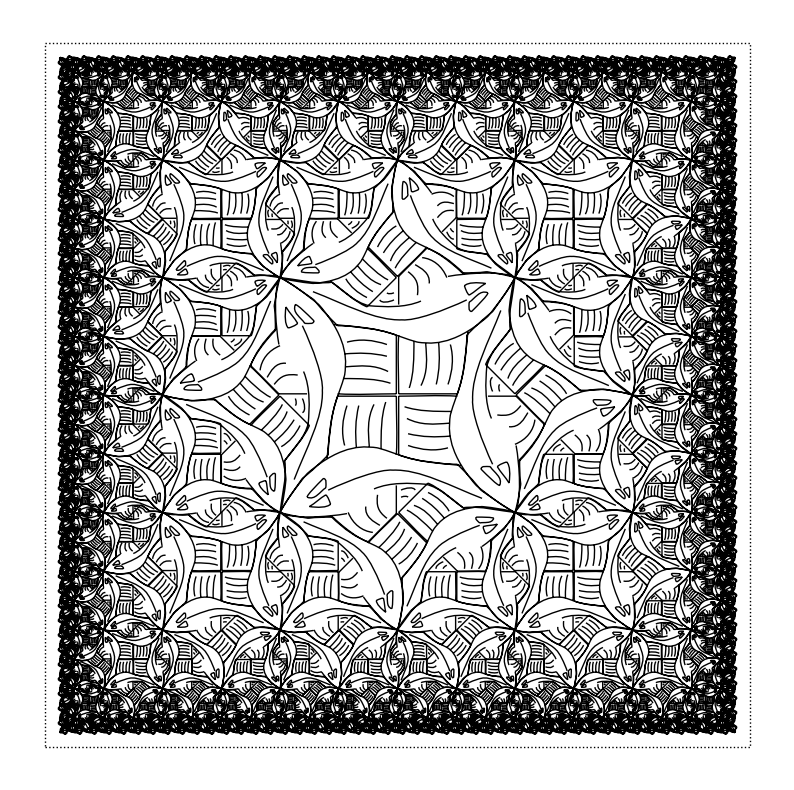

In [62]:
squarelimit(3)

   ## Approfondimenti
  Gli studenti interessati, possono approfondire gli argomenti introdotti in questa lezione, leggendo un articolo di [Functional Geometry](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf) e provare ad individuare connessioni con argomenti affrontati in altri corsi.

Il presente notebook è a disposizione alla pagina seguente:

[https://github.com/stegua/escher-2k24](https://github.com/stegua/escher-2k24)

### Riferimenti
1. Henderson, P., 1982, August. Functional geometry. In Proceedings of the 1982 ACM Symposium on LISP and Functional Programming (pp. 179-187).
2. La libreria [svgpath2mpl](https://github.com/nvictus/svgpath2mpl) è usata nella libreria escherFish.py
3. La classe Tile e` stata ripresa e riadatta da questo sito [https://github.com/mapio/programming-with-escher/blob/master/notebook.ipynb](https://github.com/mapio/programming-with-escher/blob/master/notebook.ipynb)